## DatasetBase Usage

In [1]:
import sys
import os

# to import CAMUSDataset class from dataset_camus file
camus_dataset_dir = os.path.abspath('../dataset')
sys.path.append(camus_dataset_dir)
from dataset_camus import CAMUSDataset

# to import PreProcess from 'model' file
model_dir = os.path.abspath('../model')
sys.path.append(model_dir)
from pre_processing import PreProcessor

# to import load config files
utils_dir = os.path.abspath('../utils')
sys.path.append(utils_dir)
from handling_yaml import load_config_file

import numpy as np
import matplotlib.pyplot as plt

### Building a generator with the parameters listed below:
1. batch size = 20
2. input size = (128, 128)
3. shuffle = True
4. n_channels = 1
5. split_ratio = 0.9
6. seed = 101
dataset_features:
7. age = [50, 60]
8. sex = ["M", "F"]
9. stage = ["ES", "ED"]
10. image_quality = ["Poor", "Medium", "Good"]
11. view = ["4CH", "2CH"]

In [2]:
config_path = "../config/config_example.yaml"
config = load_config_file(config_path)
dataset = CAMUSDataset(config)

train_gen, val_gen, n_iter_train, n_iter_val= dataset.create_data_generators()
print(n_iter_train)

D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\echotrain\dataset\dataset_camus.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._clean_data_df['image_path'] = self._clean_data_df.apply(
D:\AIMedic\FinalProject_echocardiogram\echoC_Codes\echotrain\dataset\dataset_camus.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._clean_data_df['label_path'] = self._clean_data_df.apply(


102


In [5]:
dataset.raw_df

,patient_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,view,stage,sex,age,ed_frame,es_frame,image_quality,lv_edv,lv_esv,lv_ef,num_of_frame,status
0,patient0001,patient0001_2CH_ED.mhd,patient0001_2CH_ED.raw,patient0001_2CH_ED_gt.mhd,patient0001_2CH_ED_gt.raw,2CH,ED,F,56.0,1,18,Good,94.0,34.6,63.2,18,train
1,patient0001,patient0001_2CH_ES.mhd,patient0001_2CH_ES.raw,patient0001_2CH_ES_gt.mhd,patient0001_2CH_ES_gt.raw,2CH,ES,F,56.0,1,18,Good,94.0,34.6,63.2,18,train
2,patient0001,patient0001_2CH_sequence.mhd,patient0001_2CH_sequence.raw,None,None,2CH,sequence,F,56.0,1,18,Good,94.0,34.6,63.2,18,train
3,patient0001,patient0001_4CH_ED.mhd,patient0001_4CH_ED.raw,patient0001_4CH_ED_gt.mhd,patient0001_4CH_ED_gt.raw,4CH,ED,F,56.0,1,20,Good,94.0,34.6,63.2,20,train
4,patient0001,patient0001_4CH_ES.mhd,patient0001_4CH_ES.raw,patient0001_4CH_ES_gt.mhd,patient0001_4CH_ES_gt.raw,4CH,ES,F,56.0,1,20,Good,94.0,34.6,63.2,20,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,patient0450,patient0450_2CH_ES.mhd,patient0450_2CH_ES.raw,patient0450_2CH_ES_gt.mhd,patient0450_2CH_ES_gt.raw,2CH,ES,M,72.0,1,15,Good,126.1,76.5,39.4,15,validation
2696,patient0450,patient0450_2CH_sequence.mhd,patient0450_2CH_sequence.raw,None,None,2CH,sequence,M,72.0,1,15,Good,126.1,76.5,39.4,15,validation
2697,patient0450,patient0450_4CH_ED.mhd,patient0450_4CH_ED.raw,patient0450_4CH_ED_gt.mhd,patient0450_4CH_ED_gt.raw,4CH,ED,M,72.0,1,18,Good,126.1,76.5,39.4,18,validation
2698,patient0450,patient0450_4CH_ES.mhd,patient0450_4CH_ES.raw,patient0450_4CH_ES_gt.mhd,patient0450_4CH_ES_gt.raw,4CH,ES,M,72.0,1,18,Good,126.1,76.5,39.4,18,validation


In [4]:
dataset._clean_data_df

,patient_id,mhd_image_filename,raw_image_filename,mhd_label_filename,raw_label_filename,view,stage,sex,age,ed_frame,es_frame,image_quality,lv_edv,lv_esv,lv_ef,num_of_frame,status,image_path,label_path
3,patient0001,patient0001_4CH_ED.mhd,patient0001_4CH_ED.raw,patient0001_4CH_ED_gt.mhd,patient0001_4CH_ED_gt.raw,4CH,ED,F,56.0,1,20,Good,94.0,34.6,63.2,20,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
4,patient0001,patient0001_4CH_ES.mhd,patient0001_4CH_ES.raw,patient0001_4CH_ES_gt.mhd,patient0001_4CH_ES_gt.raw,4CH,ES,F,56.0,1,20,Good,94.0,34.6,63.2,20,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
9,patient0002,patient0002_4CH_ED.mhd,patient0002_4CH_ED.raw,patient0002_4CH_ED_gt.mhd,patient0002_4CH_ED_gt.raw,4CH,ED,M,55.0,1,15,Medium,119.1,60.3,49.4,15,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
10,patient0002,patient0002_4CH_ES.mhd,patient0002_4CH_ES.raw,patient0002_4CH_ES_gt.mhd,patient0002_4CH_ES_gt.raw,4CH,ES,M,55.0,1,15,Medium,119.1,60.3,49.4,15,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
15,patient0003,patient0003_4CH_ED.mhd,patient0003_4CH_ED.raw,patient0003_4CH_ED_gt.mhd,patient0003_4CH_ED_gt.raw,4CH,ED,F,36.0,1,21,Good,105.7,47.1,55.4,21,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,patient0448,patient0448_4CH_ES.mhd,patient0448_4CH_ES.raw,patient0448_4CH_ES_gt.mhd,patient0448_4CH_ES_gt.raw,4CH,ES,F,57.0,1,18,Good,78.5,30.6,61.0,18,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
2691,patient0449,patient0449_4CH_ED.mhd,patient0449_4CH_ED.raw,patient0449_4CH_ED_gt.mhd,patient0449_4CH_ED_gt.raw,4CH,ED,M,84.0,1,16,Medium,55.3,23.3,57.8,16,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
2692,patient0449,patient0449_4CH_ES.mhd,patient0449_4CH_ES.raw,patient0449_4CH_ES_gt.mhd,patient0449_4CH_ES_gt.raw,4CH,ES,M,84.0,1,16,Medium,55.3,23.3,57.8,16,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...
2697,patient0450,patient0450_4CH_ED.mhd,patient0450_4CH_ED.raw,patient0450_4CH_ED_gt.mhd,patient0450_4CH_ED_gt.raw,4CH,ED,M,72.0,1,18,Good,126.1,76.5,39.4,18,train,D:/AIMedic/FinalProject_echocardiogram/echoC_D...,D:/AIMedic/FinalProject_echocardiogram/echoC_D...


### Displaying random images from the given dataset

image_shape:  (908, 551, 1)
label_shape:  (908, 551)


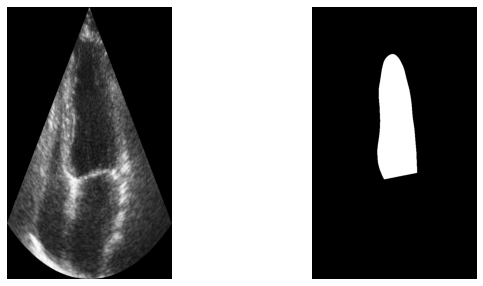

In [6]:
train_gen.random_visualization()

### Pre-processing

In [7]:
pre_processor = PreProcessor(config)

train_gen = pre_processor.add_preprocess(train_gen, True)
val_gen = pre_processor.add_preprocess(val_gen, False)

### Plotting the first image of train set batches and their labels map

iterating through the dataset by batches with 
> ### __*next()*__


X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


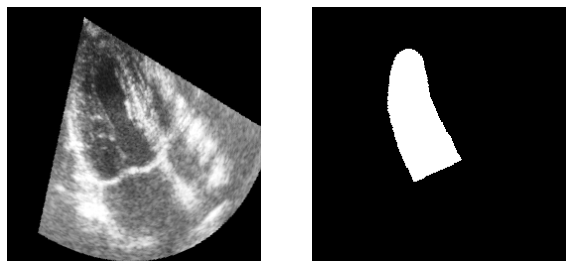

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9997358
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


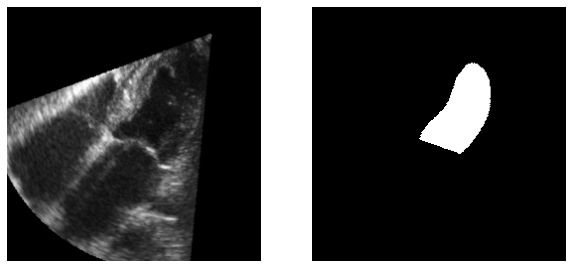

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9540748
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


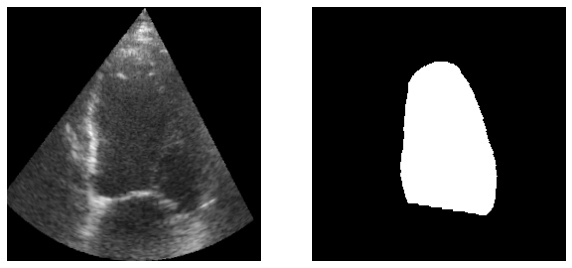

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.8529335
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


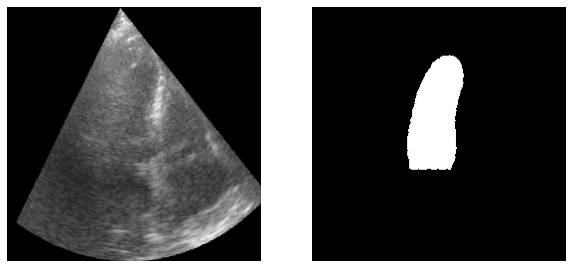

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


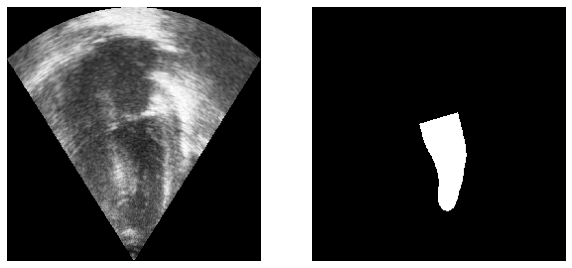

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.9976754
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


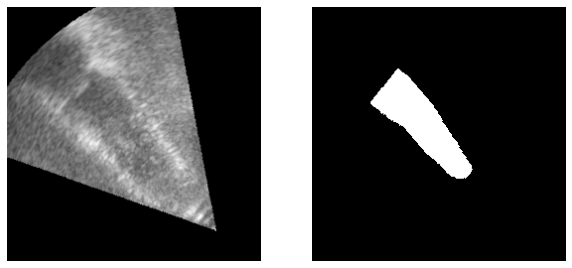

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


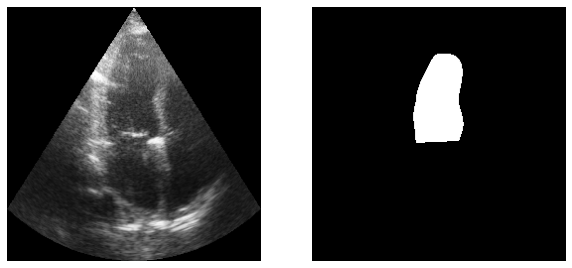

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.936646
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


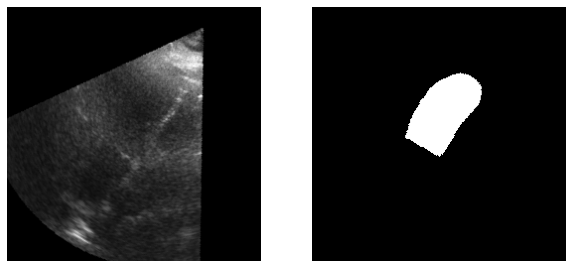

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  0.99878985
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


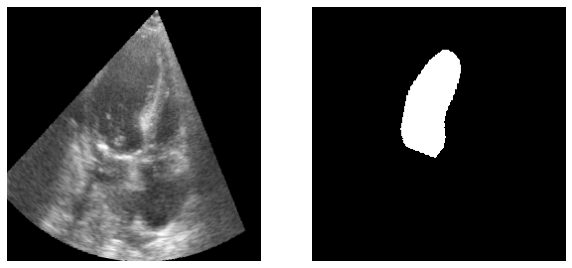

X_batch_dtype:  float32
y_batch_dtype:  float32
image_shape:  (256, 256, 1)
image_type:  <class 'numpy.ndarray'>
image_dtype:  float32
image_amax:  1.0
label_shape:  (256, 256, 1)
label_type:  <class 'numpy.ndarray'>
label_dtype:  float32
label_unique:  [0. 1.]


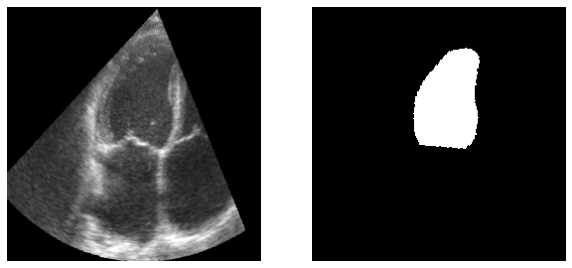

In [8]:
for i in range(10):
    item = next(train_gen)
    print("X_batch_dtype: ", item[0].dtype)
    print("y_batch_dtype: ", item[1].dtype)
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)
    print("image_shape: ", item[0][1].shape)
    print("image_type: ", type(item[0][1]))
    print("image_dtype: ", item[0][1].dtype)
    print("image_amax: ", np.amax(item[0][1]))
    ax[0].imshow(item[0][1], cmap='gray')
    ax[0].axis('off')
    print("label_shape: ", item[1][1].shape)
    print("label_type: ", type(item[1][1]))
    print("label_dtype: ", item[1][1].dtype)
    print("label_unique: ", np.unique(item[1][1]))
    ax[1].imshow(item[1][1], cmap='gray')
    ax[1].axis('off')
    plt.show()